<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/multivariable_temperatura_humedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ordinary Least Squares 
This Notebook illustrates an implementation of a simple linear regression problem using the normal equation (i.e., finding an analytical solution in the least-squares sense to a multivariable (multiple regressors, scalar prediction) regression setting) 


#### Package import

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Data and variables
This example shows how to regress (predict) systolic blood pressure values (output) from age in years and weight in pounds (input)

In [0]:
# X1 = Recuento, Temperatura, Humedad
datos = np.array([
    [156, 15, 70],
    [157, 16, 65],
    [177, 24, 71],
    [145, 13, 64],
    [197, 21, 84],
    [184, 16, 86],
    [172, 22, 72],
    [187, 18, 84],
    [157, 20, 71],
    [169, 16, 75],
    [200, 28, 84],
    [193, 27, 79],
    [167, 13, 80],
    [170, 22, 76],
    [192, 23, 88]
    
])
m = datos.shape[0]

# setup X matrix from input data (second and third column - first column is replaced with 1s)
X = np.matrix(np.column_stack((datos[:, 1:3],np.ones(m))))
print('X: \n')
print(X)

X: 

[[15. 70.  1.]
 [16. 65.  1.]
 [24. 71.  1.]
 [13. 64.  1.]
 [21. 84.  1.]
 [16. 86.  1.]
 [22. 72.  1.]
 [18. 84.  1.]
 [20. 71.  1.]
 [16. 75.  1.]
 [28. 84.  1.]
 [27. 79.  1.]
 [13. 80.  1.]
 [22. 76.  1.]
 [23. 88.  1.]]


In [0]:
# Now setup vector holding 'labels' (ground-truth data for systolic blood pressure) from input (first column)
y = np.matrix(datos[:, 0]).T
print('y: \n')
print(y)

y: 

[[156]
 [157]
 [177]
 [145]
 [197]
 [184]
 [172]
 [187]
 [157]
 [169]
 [200]
 [193]
 [167]
 [170]
 [192]]


#### compute regression coefficients 

In [0]:
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('coeficients: \n')
print(betaHat)

coeficients: 

[[ 1.58181798]
 [ 1.54244784]
 [25.71153011]]


#### Plotting and visualization

residuals y - X*betaHat: 

[[-1.41014826e+00]
 [ 5.72027294e+00]
 [ 3.81104212e+00]
 [ 8.17470696e-03]
 [ 8.50467418e+00]
 [ 3.28868391e-01]
 [ 4.32230235e-01]
 [ 3.25012811e+00]
 [-9.86168598e+00]
 [ 2.29579458e+00]
 [ 4.31948349e-01]
 [ 2.72600550e+00]
 [-2.67099067e+00]
 [-7.73756111e+00]
 [-5.82875311e+00]]


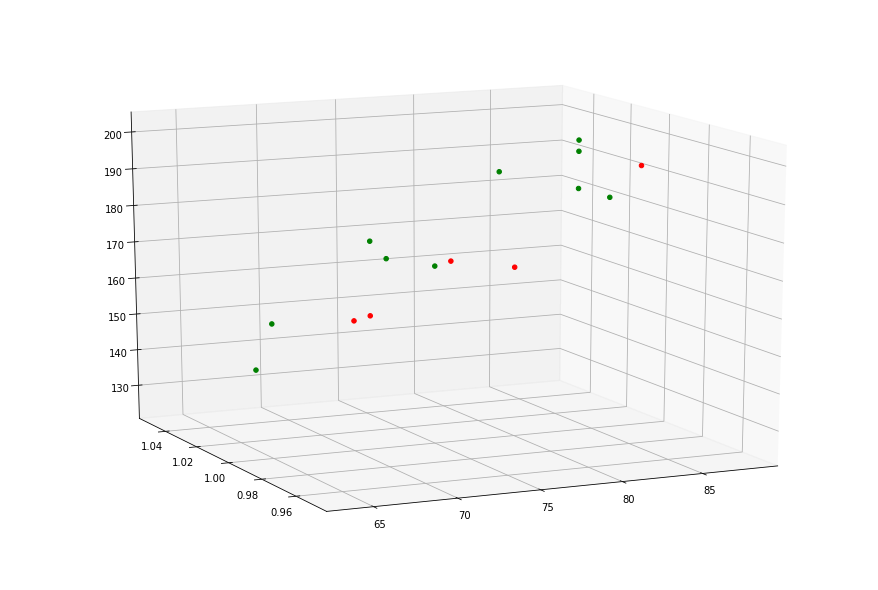

In [0]:
# Create 3D plot
xx1, xx2 = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100), np.linspace(X[:, 2].min(), X[:, 2].max(), 100))

# plot hyperplane
Z = betaHat.item(0) + betaHat.item(1) * xx1 + betaHat.item(2) * xx2

# create 3D Axis for plot
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# residuals
resid = y - np.matmul(X, betaHat)
print('residuals y - X*betaHat: \n')
print(resid)

X2 = np.asarray(X[:, 1])
X3 = np.asarray(X[:, 2])
y_arr = np.asarray(y)

ax.scatter(X2[resid >= 0], X3[resid >= 0], y_arr[resid >= 0], c='green', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0], X3[resid < 0], y_arr[resid < 0], c='red', alpha=1.0)

plt.show()